PORTFOLIO PERFORMANCE AND EFFICIENT FRONTIER ESTIMATION

In [38]:
!pip install yfinance
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install scipy
!pip install statsmodels
!pip install arch
!pip install pyflux
!pip install quantstats

  Using cached pyflux-0.4.15.tar.gz (1.3 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for numdifftools from https://files.pythonhosted.org/packages/a3/5c/37cd5db8c465db2664b2219410b8bc7743da6edb1b616b5d13008bd7cac2/numdifftools-0.9.41-py2.py3-none-any.whl.metadata
  Using cached numdifftools-0.9.41-py2.py3-none-any.whl.metadata (39 kB)
Using cached numdifftools-0.9.41-py2.py3-none-any.whl (100 kB)
  Running setup.py clean for pyflux
Failed to build pyflux


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [164 lines of output]
      C:\Users\letru\AppData\Local\Temp\pip-install-m6w3kipa\pyflux_1ef89549d23448efb2d0bffaa2dc68c6\setup.py:62: DeprecationWarning:
      
        `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
        of the deprecation of `distutils` itself. It will be removed for
        Python >= 3.12. For older Python versions it will remain present.
        It is recommended to use `setuptools < 60.0` for those Python versions.
        For more details, see:
          https://numpy.org/devdocs/reference/distutils_status_migration.html
      
      
        from numpy.distutils.core import setup
      running bdist_wheel
      running build
      running config_cc
      INFO: unifing config_cc, config, build_clib, build_ext, build commands --compiler options
      running config_fc
      INFO: unifing config_fc, config, build_clib, build

In [39]:
import yfinance as yf
import pandas as pd
import numpy as np
import quantstats as qs
import seaborn as sns
from pylab import mpl, plt
plt.style.use('seaborn')
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as scs
import statsmodels.api as sm
import math

C:\Users\letru\AppData\Local\Temp\ipykernel_14432\3700991755.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


WE DOWNLOAD ASSET PRICES FROM YAHOO FINANCE

In [40]:
ASSETS = ["TLT", "FLEX", "BRK-B", "PYPL", "GS", "MSFT", "NVDA", "ADBE"]
n_assets = len(ASSETS)

prices_df = yf.download(ASSETS, start = "2018-05-26", end = "2023-05-31")

[*********************100%%**********************]  8 of 8 completed


In [41]:
prices_df

Price        Adj Close                                                 \
Ticker            ADBE       BRK-B       FLEX          GS        MSFT   
Date                                                                    
2018-05-29  242.190002  189.869995  14.110000  199.408173   92.144051   
2018-05-30  247.399994  194.100006  14.110000  201.990814   93.027779   
2018-05-31  249.279999  191.529999  13.890000  199.099716   92.924347   
2018-06-01  251.309998  192.229996  13.950000  201.276871   94.757637   
2018-06-04  253.339996  191.300003  13.880000  202.634247   95.584969   
...                ...         ...        ...         ...         ...   
2023-05-23  370.420013  323.109985  24.570000  315.875580  313.377228   
2023-05-24  365.760010  320.200012  24.500000  312.204987  311.975616   
2023-05-25  392.059998  319.019989  25.469999  316.178192  323.973541   
2023-05-26  415.390015  320.600006  25.910000  324.114838  330.901947   
2023-05-30  417.209991  322.190002  25.799999  322.962891  329.231964   

Price                                               Close              ...  \
Ticker            NVDA       PYPL         TLT        ADBE       BRK-B  ...   
Date                                                                   ...   
2018-05-29   61.569447  80.730003  107.088577  242.190002  189.869995  ...   
2018-05-30   62.659222  81.599998  106.370255  247.399994  194.100006  ...   
2018-05-31   62.461082  82.070000  106.195023  249.279999  191.529999  ...   
2018-06-01   63.805962  83.250000  105.633942  251.309998  192.229996  ...   
2018-06-04   65.596642  84.570000  104.869972  253.339996  191.300003  ...   
...                ...        ...         ...         ...         ...  ...   
2023-05-23  306.795990  62.000000   98.310555  370.420013  323.109985  ...   
2023-05-24  305.296417  61.799999   97.824020  365.760010  320.200012  ...   
2023-05-25  379.696014  59.369999   97.580750  392.059998  319.019989  ...   
2023-05-26  389.353363  60.220001   98.368935  415.390015  320.600006  ...   
2023-05-30  401.000214  62.049999   99.351746  417.209991  322.190002  ...   

Price            Open               Volume                             \
Ticker           PYPL         TLT     ADBE    BRK-B     FLEX       GS   
Date                                                                    
2018-05-29  80.709999  120.790001  2093400  8912100  3860700  5323600   
2018-05-30  81.161003  121.000000  2319300  4307600  4083000  3348600   
2018-05-31  81.809998  121.559998  3838400  5787500  5072000  5334900   
2018-06-01  82.550003  120.169998  2773200  3817800  4005700  3330900   
2018-06-04  83.230003  120.110001  3058700  4444500  6736100  2133600   
...               ...         ...      ...      ...      ...      ...   
2023-05-23  63.029999  100.430000  2967700  4029300  5359100  1550900   
2023-05-24  61.650002  101.279999  2666600  3071500  2926100  1439100   
2023-05-25  61.740002  100.699997  7030000  4245400  6941200  1618500   
2023-05-26  59.500000  100.120003  7833600  3229400  6374000  2718700   
2023-05-30  61.040001  101.400002  5332300  3231800  4654100  1998600   

Price                                                
Ticker          MSFT       NVDA      PYPL       TLT  
Date                                                 
2018-05-29  28671000   35268400   6924200  21668100  
2018-05-30  22158500   39099600   5516200  11616300  
2018-05-31  34140900   49386800   8250100  10769900  
2018-06-01  28655600   42196800   7092100   8718800  
2018-06-04  27281600   64202400   7423700   7156500  
...              ...        ...       ...       ...  
2023-05-23  30797200   35625300  16815500  21749500  
2023-05-24  23384900   72141900  14790300  18473400  
2023-05-25  43301700  154391100  24461300  22492800  
2023-05-26  36630600   71439700  20632500  17030300  
2023-05-30  29503100   92340100  21356700  23125200  

[1260 rows x 48 columns]

<Axes: xlabel='Date'>

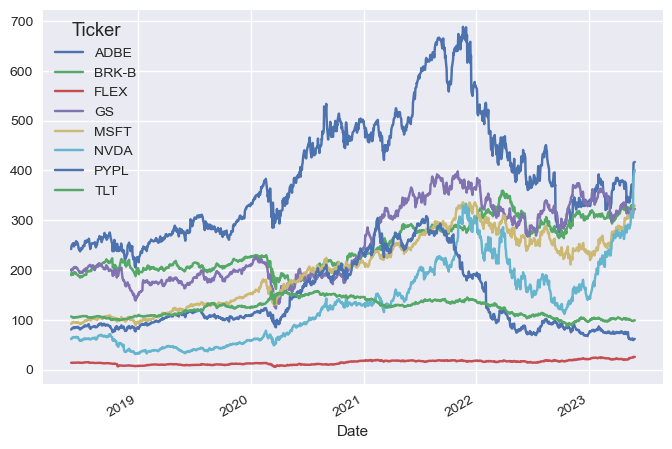

In [42]:
prices_df["Adj Close"].plot()

WE CALCULATE SIMPLE INDIVIDUAL ASSET RETURNS

In [43]:
returns = prices_df["Adj Close"].pct_change().dropna()

In [44]:
returns

Ticker,ADBE,BRK-B,FLEX,GS,MSFT,NVDA,PYPL,TLT
Date,,,,,,,,
2018-05-30,0.021512,0.022278,0.000000,0.012952,0.009591,0.017700,0.010777,-0.006708
2018-05-31,0.007599,-0.013241,-0.015592,-0.014313,-0.001112,-0.003162,0.005760,-0.001647
2018-06-01,0.008143,0.003655,0.004320,0.010935,0.019729,0.021531,0.014378,-0.005283
2018-06-04,0.008078,-0.004838,-0.005018,0.006744,0.008731,0.028064,0.015856,-0.007232
2018-06-05,-0.002526,-0.002771,0.023055,-0.006742,0.005115,0.000830,0.005676,0.002344
...,...,...,...,...,...,...,...,...
2023-05-23,-0.004381,-0.018291,0.002448,-0.004155,-0.018432,-0.015653,-0.016341,0.002879
2023-05-24,-0.012580,-0.009006,-0.002849,-0.011620,-0.004473,-0.004888,-0.003226,-0.004949
2023-05-25,0.071905,-0.003685,0.039592,0.012726,0.038458,0.243696,-0.039320,-0.002487


<Axes: xlabel='Date'>

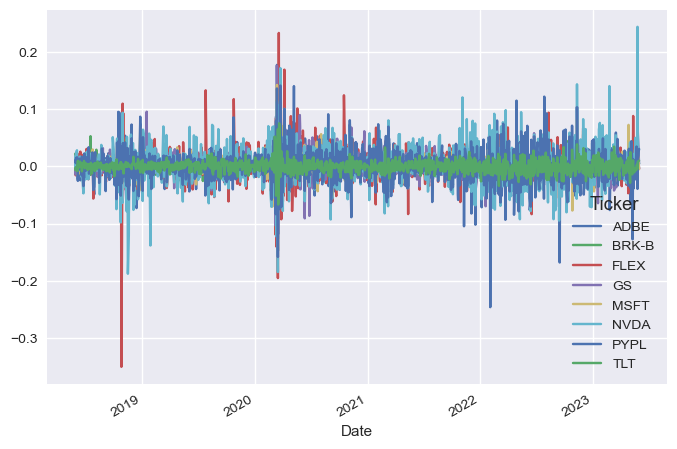

In [45]:
returns.plot()

WE ESTIMATE LOGARITHMIC RETURNS

Text(0.5, 1.0, 'Daily Log Returns')

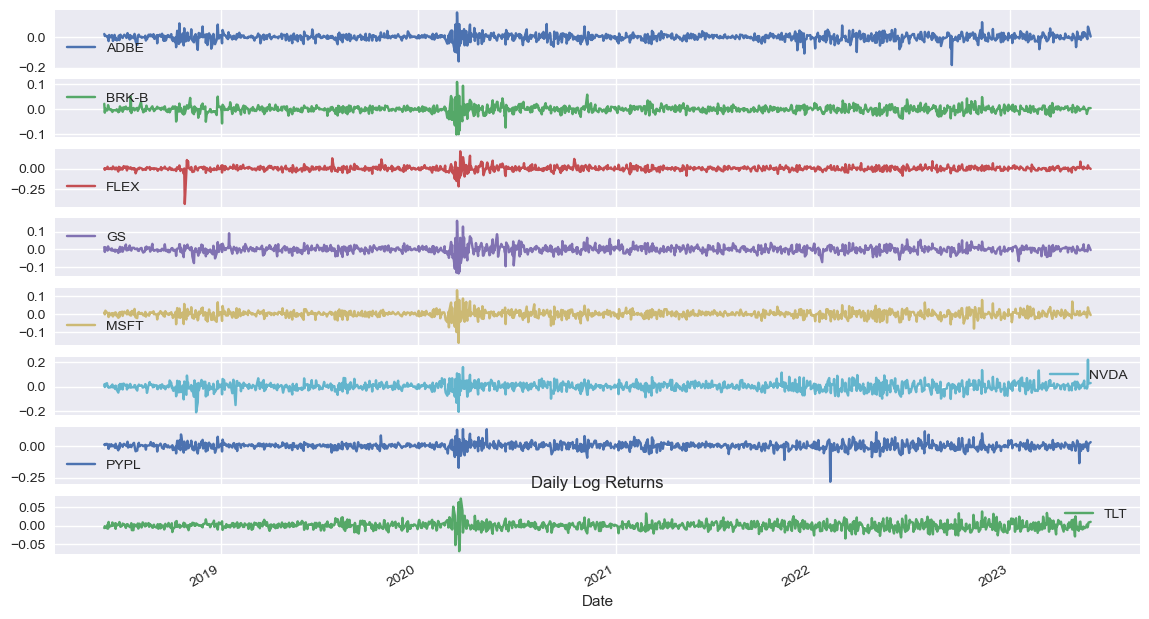

In [46]:
log_returns = np.log(prices_df["Adj Close"]/prices_df["Adj Close"].shift(1)).dropna()
log_returns.plot(subplots = True, figsize = (14,8))
plt.title('Daily Log Returns')

HISTOGRAM OF RESPECTIVE LOG RETURNS (NORMALITY TEST 1)

array([[<Axes: title={'center': 'ADBE'}>,
        <Axes: title={'center': 'BRK-B'}>,
        <Axes: title={'center': 'FLEX'}>],
       [<Axes: title={'center': 'GS'}>, <Axes: title={'center': 'MSFT'}>,
        <Axes: title={'center': 'NVDA'}>],
       [<Axes: title={'center': 'PYPL'}>,
        <Axes: title={'center': 'TLT'}>, <Axes: >]], dtype=object)

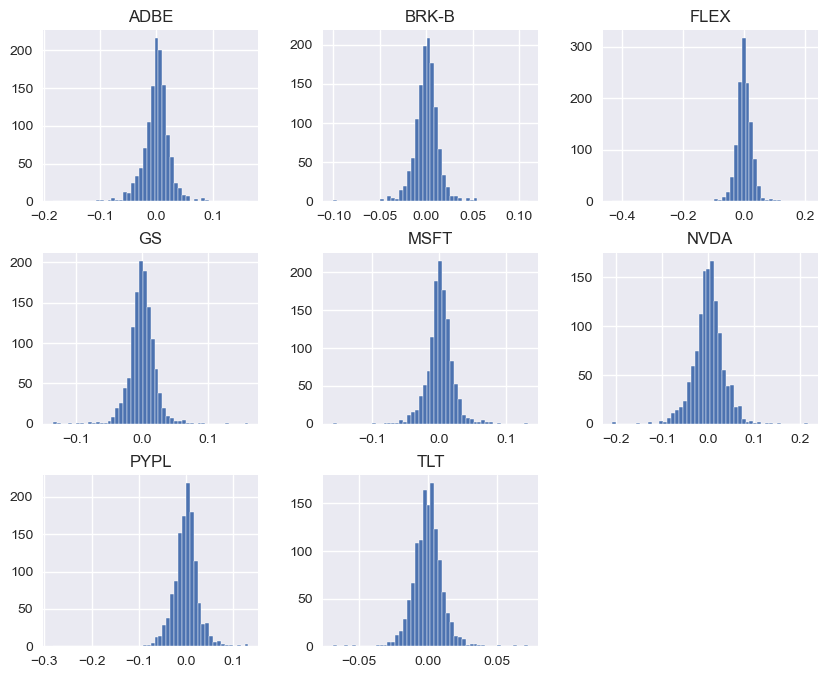

In [47]:
log_returns.hist(bins= 50, figsize=(10,8))

QUANTILE-QUANTILE PLOT FOR LOG RETURNS (NORMALITY TEST 2)

Text(0, 0.5, 'sample quantiles')

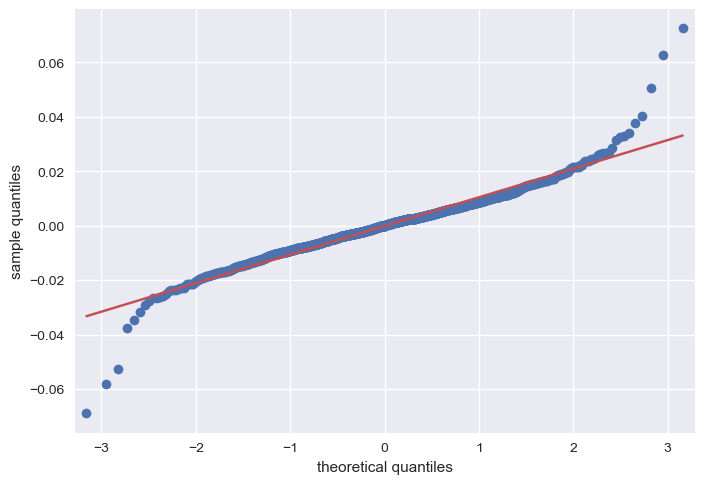

In [48]:
sm.qqplot(log_returns['TLT'].dropna(), line = 's')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

Text(0, 0.5, 'sample quantiles')

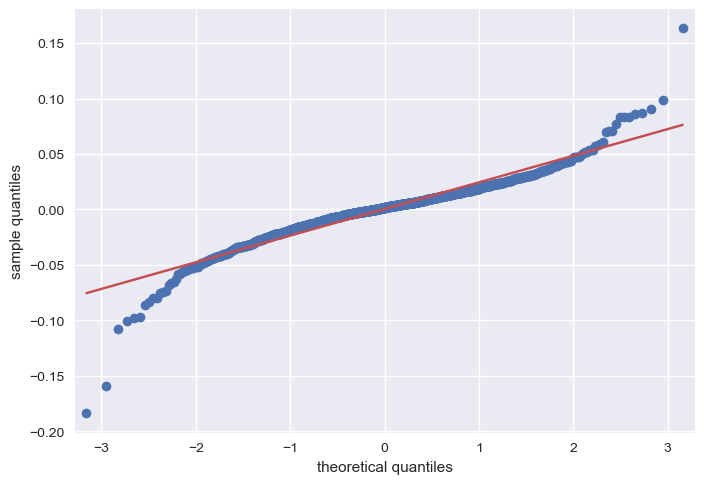

In [49]:
sm.qqplot(log_returns['ADBE'].dropna(), line = 's')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

Text(0, 0.5, 'sample quantiles')

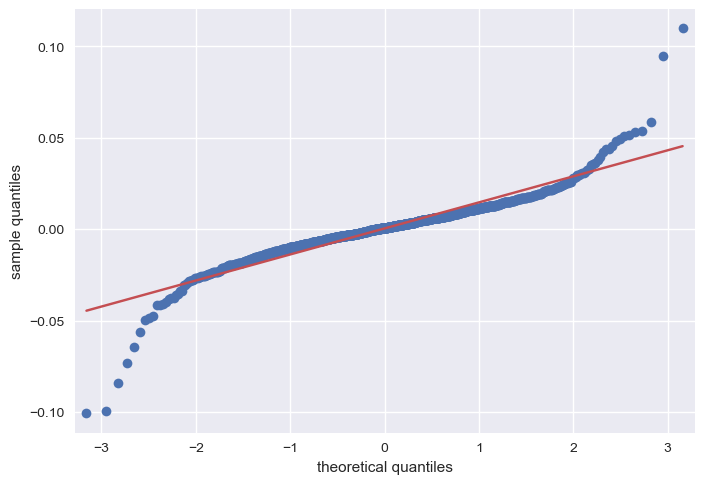

In [50]:
sm.qqplot(log_returns['BRK-B'].dropna(), line = 's')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

Text(0, 0.5, 'sample quantiles')

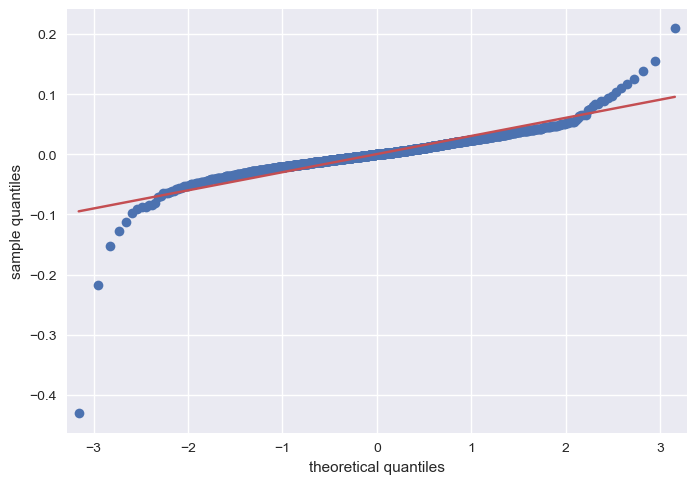

In [51]:
sm.qqplot(log_returns['FLEX'].dropna(), line = 's')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

Text(0, 0.5, 'sample quantiles')

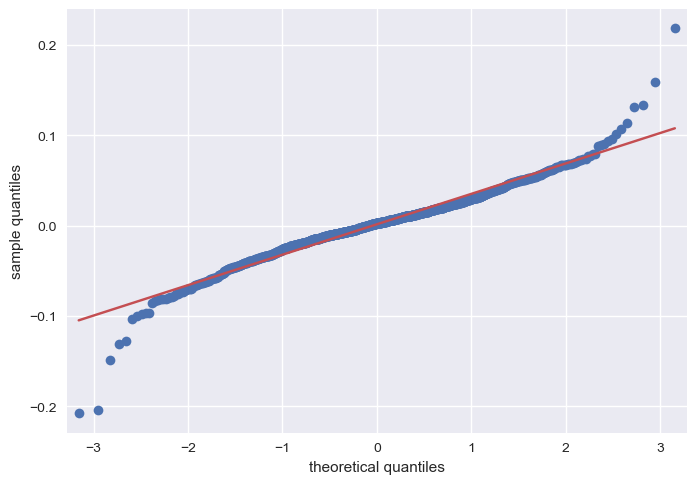

In [52]:
sm.qqplot(log_returns['NVDA'].dropna(), line = 's')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

Text(0, 0.5, 'sample quantiles')

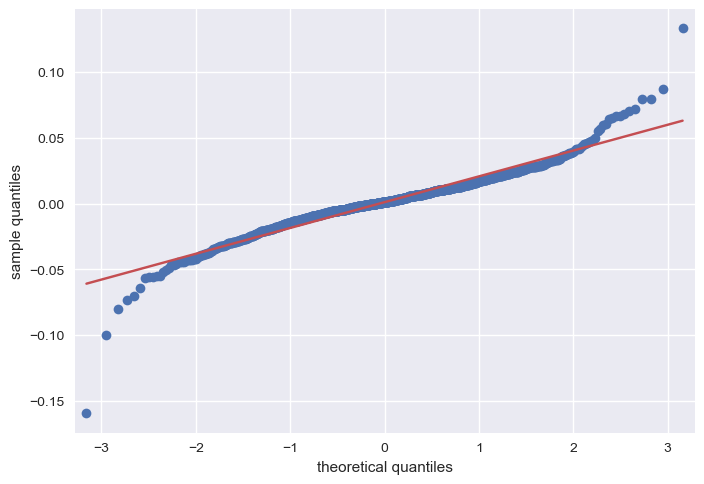

In [53]:
sm.qqplot(log_returns['MSFT'].dropna(), line = 's')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

Text(0, 0.5, 'sample quantiles')

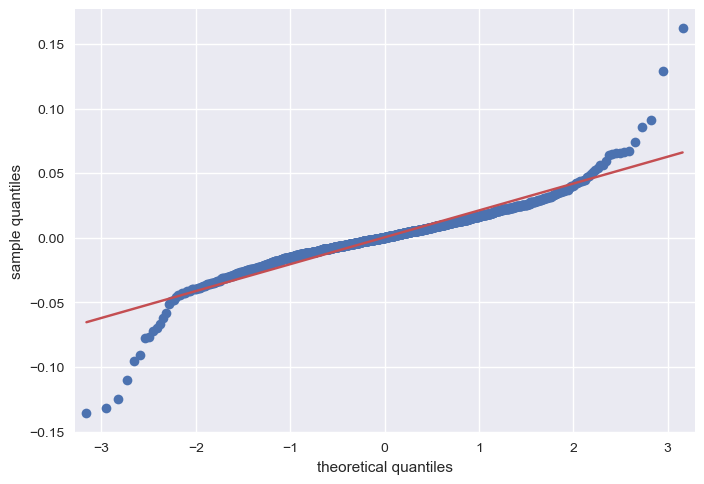

In [54]:
sm.qqplot(log_returns['GS'].dropna(), line = 's')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

Text(0, 0.5, 'sample quantiles')

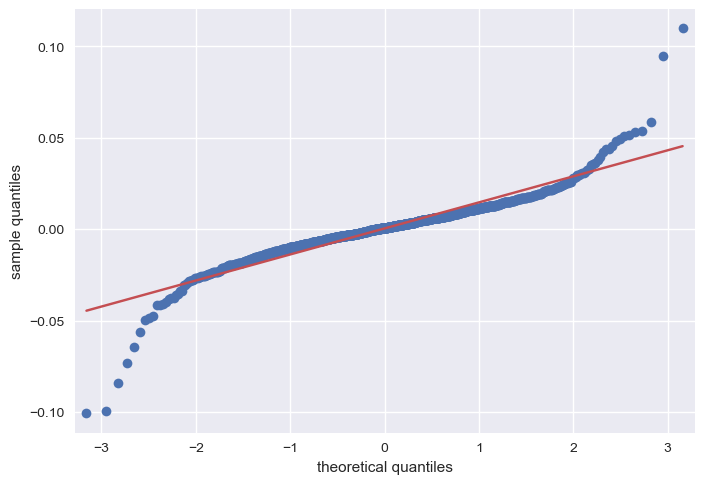

In [55]:
sm.qqplot(log_returns['BRK-B'].dropna(), line = 's')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

WE ESTIMATE ANNUAL LOG_RETURNS MEAN, COVARIANCE AND CORRELATION MATRICES

In [56]:
log_returns.mean()*252

Ticker
ADBE     0.108860
BRK-B    0.105844
FLEX     0.120794
GS       0.096513
MSFT     0.254884
NVDA     0.375057
PYPL    -0.052676
TLT     -0.015010
dtype: float64

In [57]:
log_returns.cov()*252

Ticker,ADBE,BRK-B,FLEX,GS,MSFT,NVDA,PYPL,TLT
Ticker,,,,,,,,
ADBE,0.145323,0.039947,0.080661,0.054355,0.093925,0.137717,0.108304,-0.005936
BRK-B,0.039947,0.051241,0.057240,0.056103,0.040617,0.054489,0.043394,-0.010612
FLEX,0.080661,0.057240,0.229246,0.088419,0.070290,0.129399,0.092776,-0.015595
GS,0.054355,0.056103,0.088419,0.109039,0.053868,0.081271,0.065537,-0.015856
MSFT,0.093925,0.040617,0.070290,0.053868,0.096847,0.117112,0.087600,-0.007581
NVDA,0.137717,0.054489,0.129399,0.081271,0.117112,0.285179,0.136304,-0.008569
PYPL,0.108304,0.043394,0.092776,0.065537,0.087600,0.136304,0.195198,-0.004740
TLT,-0.005936,-0.010612,-0.015595,-0.015856,-0.007581,-0.008569,-0.004740,0.027875


In [58]:
log_returns.corr()

Ticker,ADBE,BRK-B,FLEX,GS,MSFT,NVDA,PYPL,TLT
Ticker,,,,,,,,
ADBE,1.000000,0.462927,0.441921,0.431797,0.791721,0.676492,0.643042,-0.093271
BRK-B,0.462927,1.000000,0.528133,0.750565,0.576575,0.450753,0.433893,-0.280793
FLEX,0.441921,0.528133,1.000000,0.559246,0.471739,0.506083,0.438578,-0.195087
GS,0.431797,0.750565,0.559246,1.000000,0.524202,0.460875,0.449221,-0.287605
MSFT,0.791721,0.576575,0.471739,0.524202,1.000000,0.704690,0.637127,-0.145910
NVDA,0.676492,0.450753,0.506083,0.460875,0.704690,1.000000,0.577714,-0.096111
PYPL,0.643042,0.433893,0.438578,0.449221,0.637127,0.577714,1.000000,-0.064253
TLT,-0.093271,-0.280793,-0.195087,-0.287605,-0.145910,-0.096111,-0.064253,1.000000


WE PLOT A CORRELATION MATRIX WITH A HEATMAP STYLE 

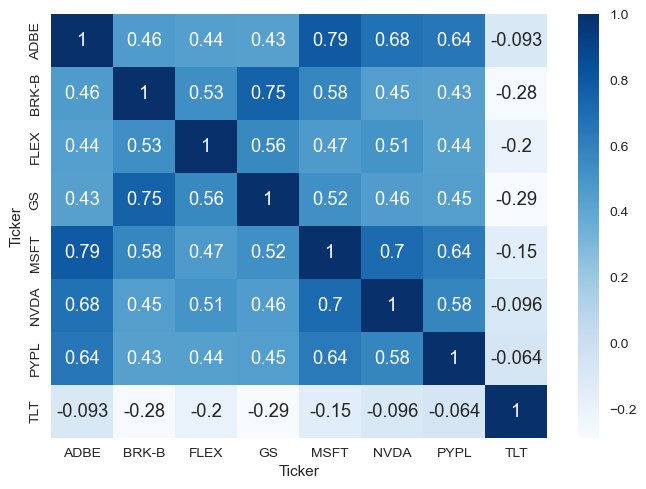

In [59]:
sns.heatmap(log_returns.corr(), annot = True, cmap= "Blues")
plt.show()

WE DEFINE THE WEIGHTS

In [60]:
Portfolio_weights = n_assets * [1 / n_assets]

In [61]:
Portfolio_weights

[0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125]

WE CALCULATE PORTFOLIO RETURNS

In [62]:
portfolio_returns = pd.Series(np.dot(Portfolio_weights, log_returns.T), index= log_returns.index)

In [63]:
portfolio_returns

Date
2018-05-30    0.010908
2018-05-31   -0.004509
2018-06-01    0.009595
2018-06-04    0.006216
2018-06-05    0.003082
                ...   
2023-05-23   -0.009069
2023-05-24   -0.006728
2023-05-25    0.041305
2023-05-26    0.021650
2023-05-30    0.008225
Length: 1259, dtype: float64

WE GET BASIC PORTFOLIO PERFORMANCE

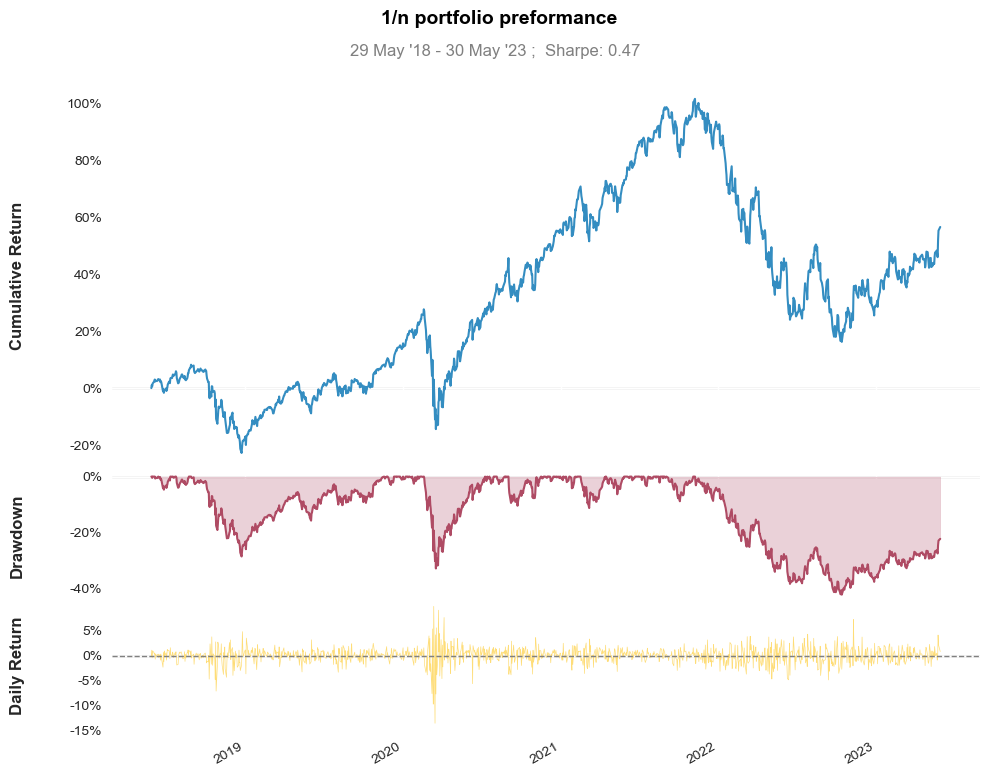

In [64]:
qs.plots.snapshot(portfolio_returns, title = "1/n portfolio preformance", grayscale = False)

WE CALCULATE BASIC PORTFOLIO EVALUATION METRICS

In [65]:
qs.reports.metrics(portfolio_returns, mode = "basic", prepare_returns= False)

                    Strategy
------------------  ----------
Start Period        2018-05-30
End Period          2023-05-30
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   56.64%
CAGR﹪              6.39%

Sharpe              0.48
Prob. Sharpe Ratio  85.35%
Sortino             0.65
Sortino/√2          0.46
Omega               1.09

Max Drawdown        -42.35%
Longest DD Days     568

Gain/Pain Ratio     0.09
Gain/Pain (1M)      0.45

Payoff Ratio        0.88
Profit Factor       1.09
Common Sense Ratio  0.96
CPC Index           0.53
Tail Ratio          0.88
Outlier Win Ratio   3.57
Outlier Loss Ratio  3.75

MTD                 5.85%
3M                  12.69%
6M                  18.07%
YTD                 21.85%
1Y                  8.56%
3Y (ann.)           6.23%
5Y (ann.)           6.61%
10Y (ann.)          6.39%
All-time (ann.)     6.39%

Avg. Drawdown       -3.61%
Avg. Drawdown Days  31
Recovery Factor     1.47
Ulcer Index         0.18
Serenity Index      0.17


PORTFOLIO OPTIMIZATION USING MONTECARLO SIMULATION

In [66]:
weights = np.random.random(n_assets)
weights /= np.sum(weights)
weights
  

array([0.0095602 , 0.09411698, 0.24698602, 0.12690986, 0.09810849,
       0.06995449, 0.15597868, 0.19838529])

In [67]:
weights.sum()

1.0

WE ESTIMATE ANNUALIZED EXPECTED PORTFOLIO RETURN

In [68]:
np.sum(log_returns.mean()*weights)*252

0.09313458024555503

WE ESTIMATE ANNUALIZED (EXPECTED) PORTFOLIO VARIANCE

In [69]:
np.dot(weights.T, np.dot(log_returns.cov()*252, weights))


0.062032504424136256

WE ESTIMATE ANNUALIZED EXPECTED PORTFOLIO VOLATILITY

In [70]:
math.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*252, weights)))

0.24906325386161696

MONTECARLO SIMULATION TO GENERATE RANDOM PORTFOLIO

In [71]:
prets = []
pvols = []
for  p in range (1500):
     weights = np.random.random(n_assets)
     weights /= np.sum(weights)
     prets.append(np.sum(log_returns.mean()*weights)*252)
     pvols.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*252, weights))))
prets = np.array(prets)
pvols = np.array(pvols)    

WE PLOT THE EFFICIENT FRONTIER

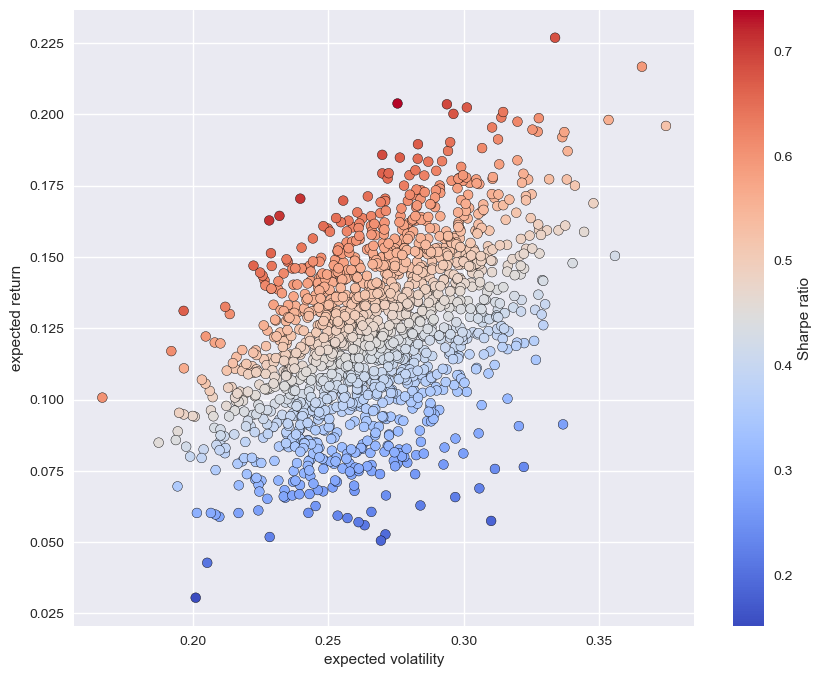

In [72]:
plt.figure(figsize=(10,8))
plt.scatter(pvols, prets, c=prets / pvols, marker = 'o', cmap= 'coolwarm', edgecolors= "black")
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')